# ***Libraries***

In [9]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


# ***Load data***

In [10]:
import os
dataset_path="/content/drive/MyDrive/Teeth_Dataset"
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    f"{dataset_path}/Training", image_size=(256,256),batch_size=32
)
valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    f"{dataset_path}/Validation", image_size=(256,256),batch_size=32
)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    f"{dataset_path}/Testing", image_size=(256,256),batch_size=32
)

print("Class names:", train_ds.class_names)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1508 files belonging to 10 classes.
Class names: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


# ***Data Visualization***

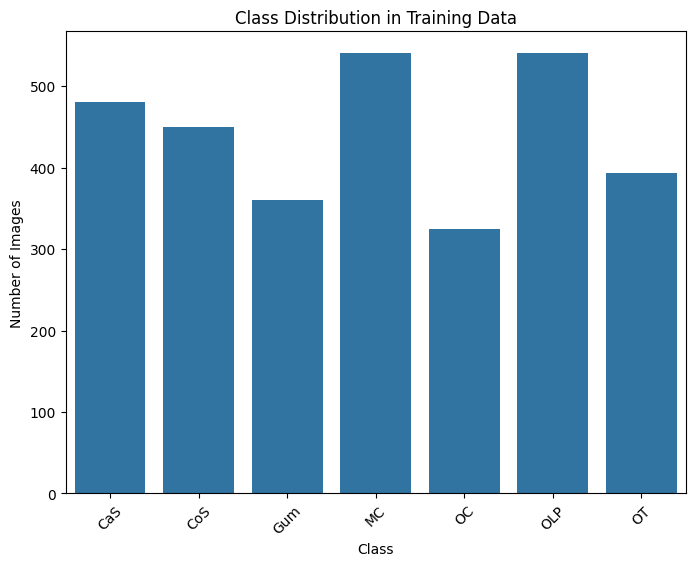

In [11]:
class_names = train_ds.class_names
num_classes = len(class_names)

# Count images per class
counts = {cls: 0 for cls in class_names}
for images, labels in train_ds:
    for label in labels.numpy():
        counts[class_names[label]] += 1

# Plot distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Data")
plt.show()


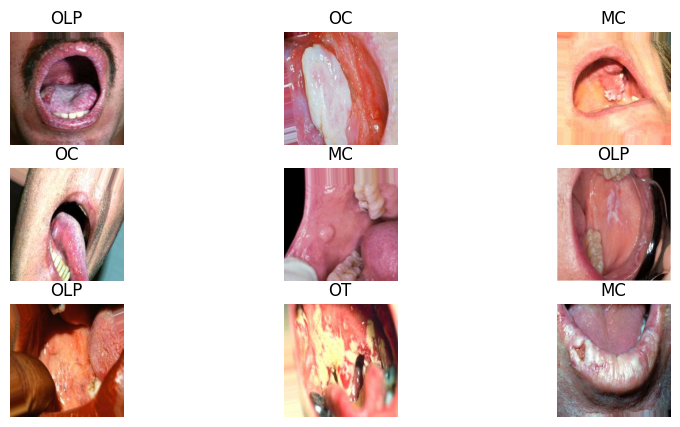

In [12]:
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# ***Data Augmentation***

In [22]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

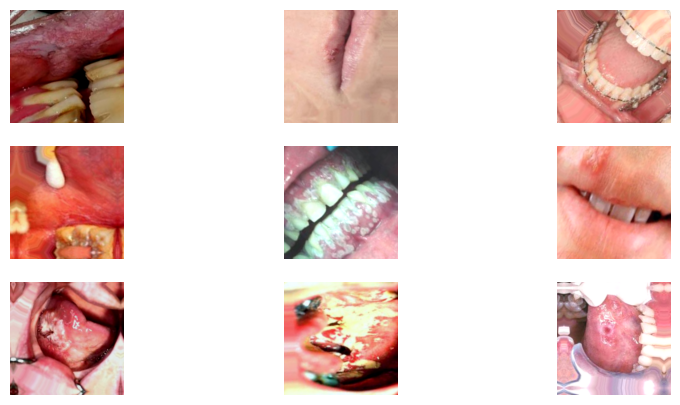

In [23]:
plt.figure(figsize=(10, 5))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_img = data_augmentation(images)
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_img[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()


# ***Preprocessing***

In [24]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# ***Model Architecture***

In [16]:
from tensorflow.keras import layers, models
model=models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')

])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 60, 60, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 30, 30, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 115200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 128)                   │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 7)                     │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,879 (56.61 MB)

 Trainable params: 14,839,879 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    normalized_train_ds,
    validation_data=normalized_valid_ds,
    epochs=50
)
loss, accuracy = model.evaluate(normalized_test_ds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.1587 - loss: 234.2366 - val_accuracy: 0.1984 - val_loss: 1.9157
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.2001 - loss: 1.9040 - val_accuracy: 0.2198 - val_loss: 1.8801
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.1895 - loss: 1.9121 - val_accuracy: 0.2091 - val_loss: 1.8961
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.2007 - loss: 1.8998 - val_accuracy: 0.2043 - val_loss: 1.9017
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.2016 - loss: 1.9017 - val_accuracy: 0.1994 - val_loss: 1.9026
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.1812 - loss: 1.8967 - val_accuracy: 0.2267 - val_loss: 1.8525
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - accuracy: 0.2068 - loss: 1.8858 - val_accuracy: 0.2072 - val_loss: 1.8993
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.2129 - loss: 1.8804 - val_accu

In [18]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(
    normalized_train_ds,
    validation_data=normalized_valid_ds,
    epochs=50
)
loss, accuracy = model.evaluate(normalized_test_ds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 490ms/step - accuracy: 0.1658 - loss: 2.3319 - val_accuracy: 0.1751 - val_loss: 1.9438
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 414ms/step - accuracy: 0.1654 - loss: 1.9391 - val_accuracy: 0.1751 - val_loss: 1.9410
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 434ms/step - accuracy: 0.1798 - loss: 1.9335 - val_accuracy: 0.1751 - val_loss: 1.9376
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 426ms/step - accuracy: 0.1774 - loss: 1.9360 - val_accuracy: 0.1751 - val_loss: 1.9404
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 421ms/step - accuracy: 0.1645 - loss: 1.9350 - val_accuracy: 0.1751 - val_loss: 1.9408
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 428ms/step - accuracy: 0.1601 - loss: 1.9336 - val_accuracy: 0.1868 - val_loss: 1.9402
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 423ms/step - accuracy: 0.1514 - loss: 1.9374 - val_accuracy: 0.1751 - val_loss: 1.9421
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 422ms/step - accuracy: 0.1751 - loss: 1.9400 - val_accu

# ***Pretrained model ResNet50***

In [21]:
from tensorflow.keras.applications import ResNet50

# Load the pretrained ResNet50 model, excluding the fully connected layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model's layers (fine-tuning comes later)
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(normalized_train_ds, epochs=50, validation_data=normalized_valid_ds)

# Fine-tune by unfreezing some layers
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Continue training
model.fit(normalized_train_ds, epochs=50, validation_data=normalized_valid_ds)

loss, accuracy = model.evaluate(normalized_test_ds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 32s 223ms/step - accuracy: 0.1621 - loss: 2.1066 - val_accuracy: 0.1741 - val_loss: 1.9374
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.1702 - loss: 1.9382 - val_accuracy: 0.1751 - val_loss: 1.9311
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.1781 - loss: 1.9309 - val_accuracy: 0.1751 - val_loss: 1.9341
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.1773 - loss: 1.9345 - val_accuracy: 0.1751 - val_loss: 1.9317
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.1767 - loss: 1.9302 - val_accuracy: 0.1751 - val_loss: 1.9288
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.1772 - loss: 1.9297 - val_accuracy: 0.1751 - val_loss: 1.9263
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.1835 - loss: 1.9272 - val_accuracy: 0.2160 - val_loss: 1.9281
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 166ms/step - accuracy: 0.1788 - loss: 1.9261 - val_accu

# **Reeduce Overfitting with Regularization**

In [25]:
from tensorflow.keras import regularizers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(normalized_train_ds, epochs=50, validation_data=normalized_valid_ds)

# Fine-tune by unfreezing some layers
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Continue training
model.fit(normalized_train_ds, epochs=32, validation_data=normalized_valid_ds)

loss, accuracy = model.evaluate(normalized_test_ds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 131s 772ms/step - accuracy: 0.3812 - loss: 2.1603 - val_accuracy: 0.2626 - val_loss: 5.7692
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 412ms/step - accuracy: 0.5427 - loss: 1.4481 - val_accuracy: 0.2909 - val_loss: 3.4259
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - accuracy: 0.6334 - loss: 1.1973 - val_accuracy: 0.2247 - val_loss: 4.4612
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 419ms/step - accuracy: 0.7048 - loss: 1.0415 - val_accuracy: 0.3327 - val_loss: 3.7461
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 407ms/step - accuracy: 0.7966 - loss: 0.7703 - val_accuracy: 0.5360 - val_loss: 2.3533
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 39s 406ms/step - accuracy: 0.8361 - loss: 0.6185 - val_accuracy: 0.5739 - val_loss: 2.1965
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 406ms/step - accuracy: 0.8355 - loss: 0.6247 - val_accuracy: 0.6420 - val_loss: 1.3564
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 39s 405ms/step - accuracy: 0.8508 - loss: 0.5634 - val_acc

# ***Saving***

In [27]:
model.save("teeth_classification_model.h5")

In [28]:
!apt install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [36]:
!git clone https://github.com/AmalHumaiat/teeth-classification-project_v1.git
!cp /content/teeth_classification_model_v1.ipynb /content/teeth-classification-project_v1/

fatal: destination path 'teeth-classification-project_v1' already exists and is not an empty directory.
cp: cannot stat '/content/teeth_classification_model_v1.ipynb': No such file or directory


In [34]:
!ls /content/

drive  sample_data  teeth_classification_model.h5  teeth-classification-project_v1
